In [1]:
# importing Libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
df = pd.read_csv('IMDb_Movies_India.csv')        #HERE PASTE THE FILE PATH
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(15509, 10)

In [4]:
df.isnull().sum()         #Check any null value or not

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# Feature Enginerring for Rating Column

In [5]:
df.dropna(subset=['Rating'], inplace=True)

In [6]:
df.head(12)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,-1991.0,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,-2012.0,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [7]:
df.shape

(7919, 10)

In [8]:
df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

# Feature Enginerring for  Duration Column

In [9]:
df['Duration'].isnull().mean()*100

26.114408384897082

In [10]:
df['Duration'].isnull().sum()        #Here, 53% data are missing so,it is column is not usefull in our machine learning model

2068

In [11]:
df=df.drop(columns=['Duration','Name'])

In [12]:
df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...
15501,-1992.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,-1989.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,-1988.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,-1999.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


# Feature Enginerring for  Director Column

In [13]:
df["Director"].isnull().mean()*100

0.06313928526329082

In [14]:
df['Director'].isnull().sum()

5

In [15]:
df['Director'].fillna(value='Mahesh Bhatt', inplace=True)

In [16]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,-2019.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,-2019.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,-1997.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,-2005.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,-2012.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [17]:
df.isnull().sum()

Year          0
Genre       102
Rating        0
Votes         0
Director      0
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

# Feature Enginerring for  Year Column

In [18]:
df['Year'] = df['Year'].abs()

In [19]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [20]:
df.isnull().sum()

Year          0
Genre       102
Rating        0
Votes         0
Director      0
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

In [21]:
df['Votes'] = df['Votes'].str.replace(',', '')

# Feature Enginerring for Genre Column

In [22]:
df['Genre'].mode()

0    Drama
Name: Genre, dtype: object

In [23]:
df['Genre'].fillna(value='Drama', inplace=True)

In [24]:
df.isnull().sum()

Year          0
Genre         0
Rating        0
Votes         0
Director      0
Actor 1     125
Actor 2     200
Actor 3     292
dtype: int64

In [25]:
df.shape

(7919, 8)

In [26]:
df.head(5)

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [27]:
df['Director'].unique()

array(['Gaurav Bakshi', 'Ovais Khan', 'Rahul Rawail', ...,
       'Sumitra Bhave', 'Girish Girija Joshi', 'Mozez Singh'],
      dtype=object)

In [28]:
df['Genre'] = df['Genre'].astype(str)
df['Director'] = df['Director'].astype(str)
df['Votes'] = df['Votes'].astype(int)
df['Year'] = df['Year'].astype(int)

In [29]:
df.dtypes

Year          int32
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

# Concat All Actor Column in One Column

In [30]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)
actor_ratings = pd.DataFrame({'Actor': actors, 'Rating': df['Rating']})

# Group the data by actor and calculate the average rating of the movies in which each actor has acted
actor_average_rating = actor_ratings.groupby('Actor')['Rating'].mean()

df['Avg_Rating_by_Actor'] = df['Actor 1'].map(actor_average_rating)

In [31]:
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Avg_Rating_by_Actor
1,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,5.450000
3,2019,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.633333
5,1997,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.827273
6,2005,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.757143
8,2012,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,NaN


In [32]:
missing_values = df.isnull().sum()

print("Number of missing values in each column:")           # Display the count of missing values for each column
print(missing_values)

Number of missing values in each column:
Year                     0
Genre                    0
Rating                   0
Votes                    0
Director                 0
Actor 1                125
Actor 2                200
Actor 3                292
Avg_Rating_by_Actor    991
dtype: int64


In [33]:
mean_rating_by_actor = df['Avg_Rating_by_Actor'].mean()         # Impute missing values in 'Avg_Rating_by_Actor' with the mean value of the column
df['Avg_Rating_by_Actor'] = df['Avg_Rating_by_Actor'].fillna(mean_rating_by_actor)

missing_values_after_imputation = df.isna().sum()

print("Number of missing values in each column after imputation:")        # Display the count of missing values for each column after imputation
print(missing_values_after_imputation)

Number of missing values in each column after imputation:
Year                     0
Genre                    0
Rating                   0
Votes                    0
Director                 0
Actor 1                125
Actor 2                200
Actor 3                292
Avg_Rating_by_Actor      0
dtype: int64


In [34]:
df= df.drop(columns=['Actor 1','Actor 2','Actor 3'])

In [35]:
df.head(5)

,Year,Genre,Rating,Votes,Director,Avg_Rating_by_Actor
1,2019,Drama,7.0,8,Gaurav Bakshi,5.450000
3,2019,"Comedy, Romance",4.4,35,Ovais Khan,5.633333
5,1997,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,5.827273
6,2005,"Drama, Romance, War",7.4,1086,Shoojit Sircar,5.757143
8,2012,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,5.830268


In [36]:
df.shape

(7919, 6)

In [37]:
df.isnull().sum()

Year                   0
Genre                  0
Rating                 0
Votes                  0
Director               0
Avg_Rating_by_Actor    0
dtype: int64

In [38]:
df.dtypes

Year                     int32
Genre                   object
Rating                 float64
Votes                    int32
Director                object
Avg_Rating_by_Actor    float64
dtype: object

# EDA (Exploratory Data Analysis)

Question:1-->find the Rating Disstirution in our data. 

Summary statistics:
              Year       Rating          Votes  Avg_Rating_by_Actor
count  7919.000000  7919.000000    7919.000000          7919.000000
mean   1993.321758     5.841621    1938.520394             5.830268
std      20.463770     1.381777   11602.415952             0.653730
min    1917.000000     1.100000       5.000000             2.000000
25%    1979.500000     4.900000      16.000000             5.618868
50%    1997.000000     6.000000      55.000000             5.830268
75%    2011.000000     6.800000     404.000000             6.073077
max    2021.000000    10.000000  591417.000000             9.300000


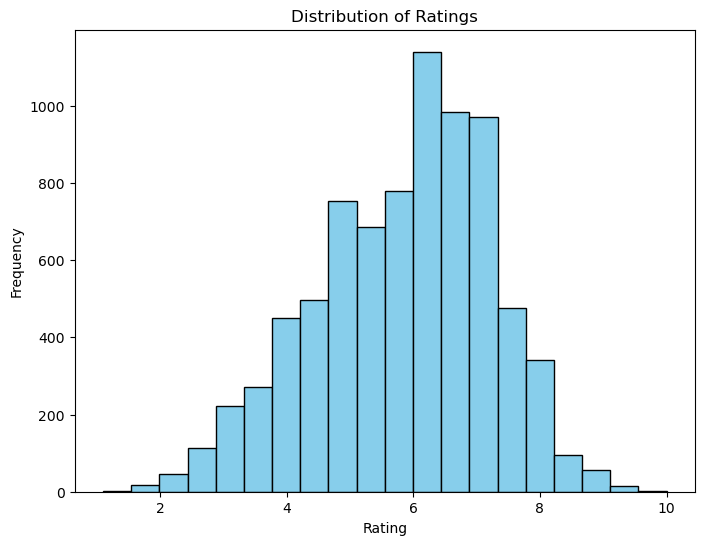

In [39]:
# Summary statistics
print("Summary statistics:")
print(df.describe())

# Histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


Question:-2 --> Movies Relaesed Distribution year wise

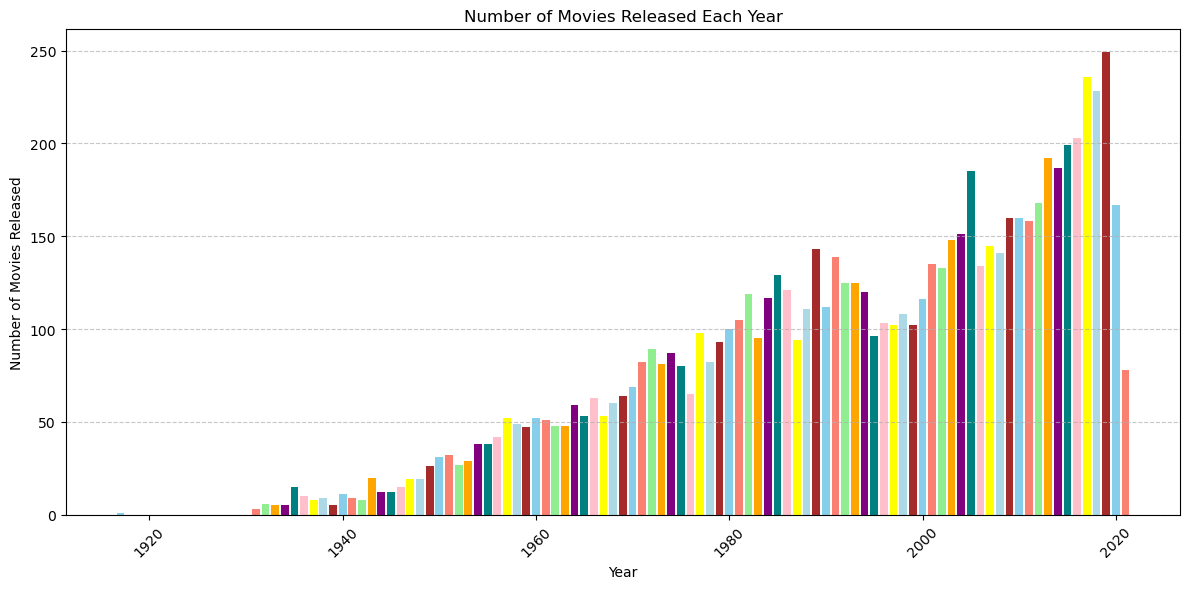

In [40]:
df['Year'] = df['Year'].astype(float)

# Count the number of movies released each year
movies_per_year = df['Year'].value_counts().sort_index()

# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'teal', 'pink', 'yellow', 'lightblue', 'brown']

# Plot the number of movies released each year
plt.figure(figsize=(12, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Question:-3 --> Gener wise and year wise Movies realsed graph.

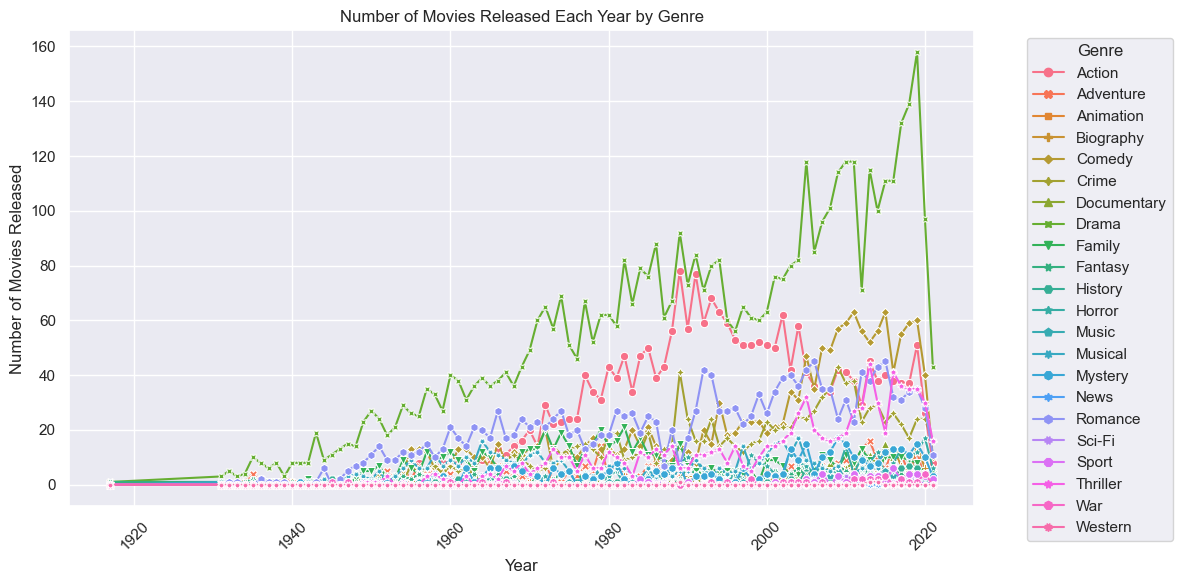

In [41]:
sns.set_theme()

genres = df['Genre'].str.get_dummies(sep=', ')
genres['Year'] = df['Year']                          # Add the 'Year' column to the new DataFrame
genres_yearwise = genres.groupby('Year').sum()       # Group by year and sum the counts of each genre

plt.figure(figsize=(12, 6))                 
sns.lineplot(data=genres_yearwise, markers=True, dashes=False)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year by Genre')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Question:- 4 --> Draw all Director to how many movies are relased

In [42]:
def TopTenPlot(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

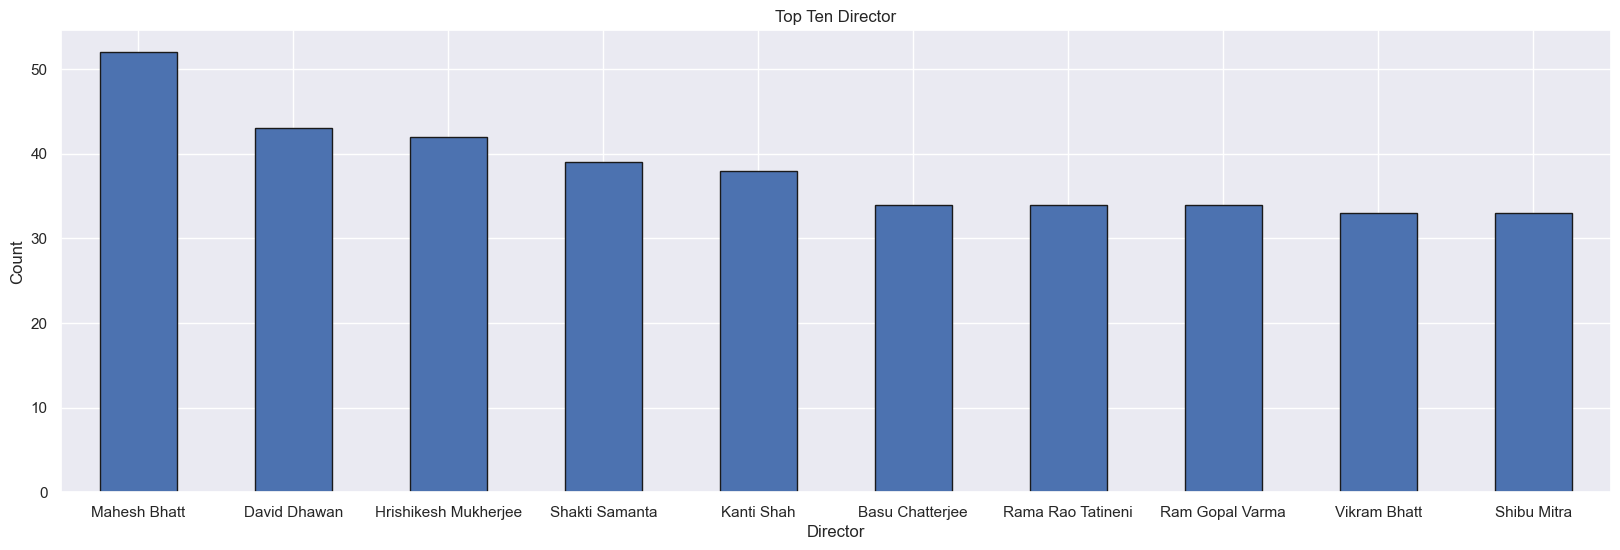

In [43]:
TopTenPlot("Director")

In [44]:
df.columns

Index(['Year', 'Genre', 'Rating', 'Votes', 'Director', 'Avg_Rating_by_Actor'], dtype='object')

# Model Selection

In [45]:
features = df.drop(columns=['Rating','Genre','Director'])
Y_PRE = df[['Rating']]      #Split Independent and Dependent Column into Feature and Target
target = Y_PRE

In [46]:
x = features
y = target

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state = 42)     #Split train and test data

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6335, 3), (1584, 3), (6335, 1), (1584, 1))

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression               #apply Linear Regression on Data set
rg_lin=LinearRegression(n_jobs=1)

rg_lin.fit(x_train,y_train)
y_pred1 = rg_lin.predict(x_test)


mae = mean_absolute_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1, squared=False)
r_squared = r2_score(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error",mse)
print("R-squared:", r_squared)

Mean Absolute Error: 1.062615634730268
Root Mean Squared Error: 1.3260506714535472
Mean Squared Error 1.7584103832624032
R-squared: 0.054183374486468705


In [50]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(rg_lin,x_train,y_train,scoring="r2",cv=10)
np.mean(mse)

0.035966611139346495

# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(splitter='best', max_depth=None, min_samples_split=150, min_samples_leaf=100,max_leaf_nodes=200)

dt.fit(x_train,y_train)
y_pred2 = dt.predict(x_test)


mae = mean_absolute_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
r_squared = r2_score(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error",mse)
print("R-squared:", r_squared)

Mean Absolute Error: 0.9244381719081523
Root Mean Squared Error: 1.2090205985307334
Mean Squared Error 1.461730807671613
R-squared: 0.21376186521595286


In [52]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(dt,x_train,y_train,scoring="r2",cv=10)
np.mean(mse)

0.23793097918209138

# Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
rg_ridge = Ridge(alpha=1.0,max_iter=100,solver="auto")      #using OLS

rg_ridge.fit(x_train,y_train)
y_pred3 = rg_ridge.predict(x_test)


mae = mean_absolute_error(y_test, y_pred3)
rmse = mean_squared_error(y_test, y_pred3, squared=False)
r_squared = r2_score(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error",mse)
print("R-squared:", r_squared)

Mean Absolute Error: 1.0626156392058799
Root Mean Squared Error: 1.3260506702442023
Mean Squared Error 1.7584103800550983
R-squared: 0.05418337621161906


In [54]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(rg_ridge,x_train,y_train,scoring="r2",cv=10)
np.mean(mse)

0.03596675451735666

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=1050, max_depth=None, min_samples_split=2000, min_samples_leaf=1,max_features='log2',max_samples=5000)

dt.fit(x_train,y_train)
y_pred4 = dt.predict(x_test)


mae = mean_absolute_error(y_test, y_pred4)
rmse = mean_squared_error(y_test, y_pred4, squared=False)
r_squared = r2_score(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error",mse)
print("R-squared:", r_squared)

Mean Absolute Error: 0.9244381719081523
Root Mean Squared Error: 1.2090205985307334
Mean Squared Error 1.461730807671613
R-squared: 0.21376186521595286


In [56]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(rf,x_train,y_train,scoring="r2",cv=10)
np.mean(mse)

C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

0.11443709912148123

# KNN

In [57]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=300,weights='distance', algorithm='kd_tree', p=2,)

kn.fit(x_train,y_train)
y_pred5 = kn.predict(x_test)


mae = mean_absolute_error(y_test, y_pred5)
rmse = mean_squared_error(y_test, y_pred5, squared=False)
r_squared = r2_score(y_test, y_pred5)
mse = mean_squared_error(y_test, y_pred5)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error",mse)
print("R-squared:", r_squared)

Mean Absolute Error: 0.9882275348026366
Root Mean Squared Error: 1.2638932352053096
Mean Squared Error 1.5974261099977438
R-squared: 0.14077385617905025


In [58]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(kn,x_train,y_train,scoring="r2",cv=10)
np.mean(mse)

0.15872924218794876

# Stacking Regression

In [59]:
from sklearn.ensemble import StackingRegressor

estimators = [                                                         # BASE model
    ('linear', LinearRegression()),
    ('tree', DecisionTreeRegressor()),
    ('forest', RandomForestRegressor())]

sr = StackingRegressor(estimators=estimators)
sr.fit(x_train,y_train)
y_pred6 = sr.predict(x_test)


mae = mean_absolute_error(y_test, y_pred6)
rmse = mean_squared_error(y_test, y_pred6, squared=False)
r_squared = r2_score(y_test, y_pred6)
mse = mean_squared_error(y_test, y_pred6)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error",mse)
print("R-squared:", r_squared)

C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 0.9237834184187955
Root Mean Squared Error: 1.1979084234031614
Mean Squared Error 1.4349845908602479
R-squared: 0.2281481636424012


In [60]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(sr,x_train,y_train,scoring="r2",cv=10)
np.mean(mse)

C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

0.22389616357067393

Compare all Algorithum Reuslt by chart

In [ ]:
# Store the mean squared errors of each model
root_mean_squared_errors = {
    'Linear Regression': 1.3260506714535472,
    'Decision Tree': 1.2090205985307336,
    'Ridge Regression': 1.3260506702442023,
    'Random Forest': 1.2090205985307334,
    'Stacking': 1.2037799013099815,
    'KNN': 1.2638932352053096
}

# Plot the mean squared errors
plt.figure(figsize=(10, 6))
plt.bar(root_mean_squared_errors.keys(), root_mean_squared_errors.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('root Mean Squared Error')
plt.title('Comparison of root Mean Squared Error across Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Draw Predict line 

C:\Users\jasmi\anaconda3\Lib\site-packages\sklearn\ensemble\_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 0.9274942337685153
Root Mean Squared Error: 1.20688397192525
Mean Squared Error 1.4565689216900675
R-squared: 0.2165383488097843


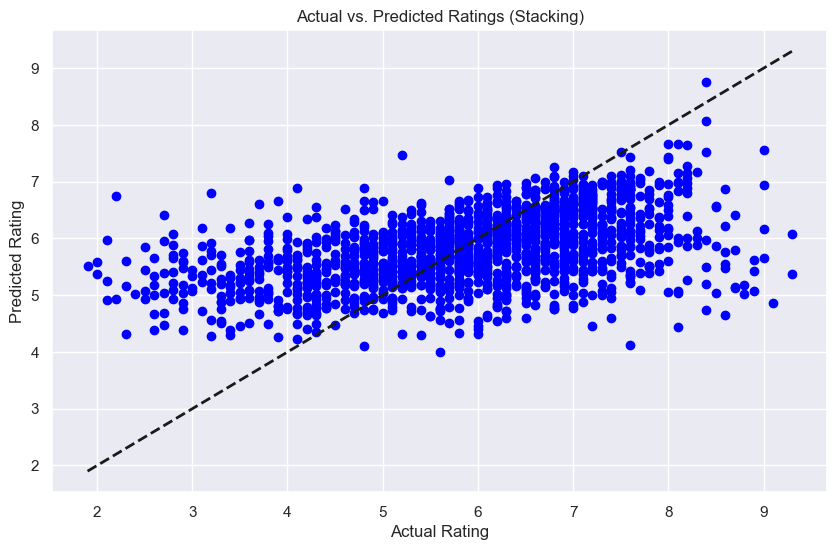

In [62]:
estimators = [                                                         # Define your 
    ('linear', LinearRegression()),
    ('tree', DecisionTreeRegressor()),
    ('forest', RandomForestRegressor())]

sr = StackingRegressor(estimators=estimators)
sr.fit(x_train,y_train)
y_pred6 = sr.predict(x_test)


mae = mean_absolute_error(y_test, y_pred6)
rmse = mean_squared_error(y_test, y_pred6, squared=False)
r_squared = r2_score(y_test, y_pred6)
mse = mean_squared_error(y_test, y_pred6)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Squared Error",mse)
print("R-squared:", r_squared)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings (Stacking)')
plt.show()

Compare Actual And Predict value

In [104]:
y_test=np.array(y_test)
y_pred6=np.array(y_pred6)

y_test=y_test.tolist()
y_pred6=y_pred6.tolist()

In [106]:
data = {'Actual Ratings': y_test, 'Predicted Ratings': y_pred6}
result_df = pd.DataFrame(data)

In [107]:
result_df

,Actual Ratings,Predicted Ratings
0,[3.3],[4.508551764826907]
1,[5.3],[5.911030329282347]
2,[5.7],[5.2046351786726515]
3,[7.2],[4.4561022273114546]
4,[3.5],[5.539571191738822]
...,...,...
1579,[5.9],[5.431221295375297]
1580,[5.8],[5.949198261610978]
1581,[4.5],[5.73418643577106]
1582,[5.0],[5.091815039133374]


In [108]:
result_df = result_df.applymap(lambda x: float(x[0]))

In [109]:
result_df

,Actual Ratings,Predicted Ratings
0,3.3,4.508552
1,5.3,5.911030
2,5.7,5.204635
3,7.2,4.456102
4,3.5,5.539571
...,...,...
1579,5.9,5.431221
1580,5.8,5.949198
1581,4.5,5.734186
1582,5.0,5.091815


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


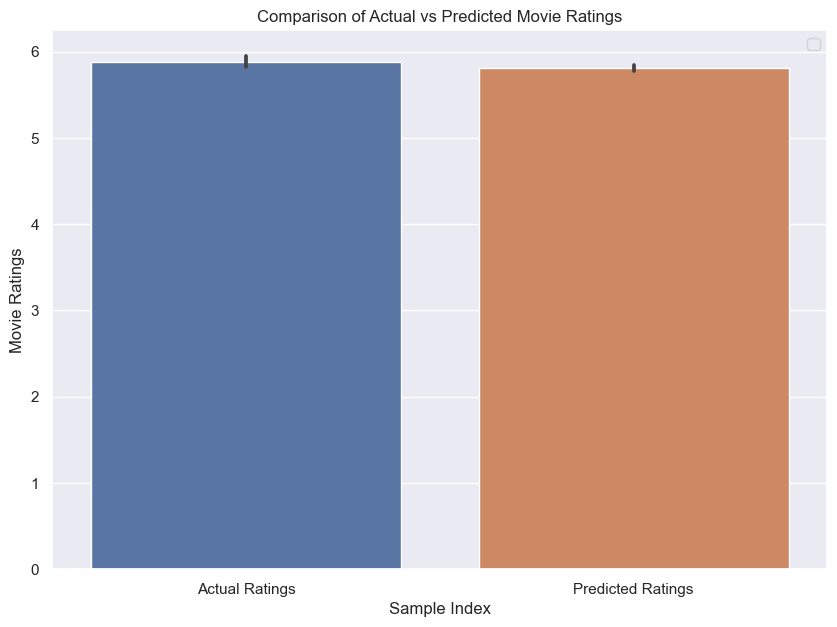

In [114]:
# Plot the actual and predicted ratings
plt.figure(figsize=(10, 7))
sns.barplot(data=result_df)

plt.xlabel('Sample Index')
plt.ylabel('Movie Ratings')
plt.title('Comparison of Actual vs Predicted Movie Ratings')
plt.legend(loc='upper right')
plt.show()
